Import necessary modules.

In [1]:
# Import correct modules using accurate aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from datetime import datetime

%matplotlib inline

Import all datasets.

In [2]:
# Import dengue cases and serology data
serotype_df = pd.read_csv("../datasets/dengue_data_cleaned.csv")

# Convert the time column to datetime format
serotype_df['date'] = pd.to_datetime(serotype_df['date'])

# Sort dengue cases and serology data in chronological order (ascending) 
serotype_df = serotype_df.sort_values('date')

In [3]:
serotype_df.head(3)

,date,dengue_cases,denv_1,denv_2,denv_3,denv_4
221,2017-12-31,83,0.177,0.581,0.226,0.016
226,2018-01-07,68,0.423,0.192,0.321,0.064
227,2018-01-14,54,0.423,0.192,0.321,0.064


In [4]:
serotype_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 221 to 11
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          273 non-null    datetime64[ns]
 1   dengue_cases  273 non-null    int64         
 2   denv_1        273 non-null    float64       
 3   denv_2        273 non-null    float64       
 4   denv_3        273 non-null    float64       
 5   denv_4        273 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 14.9 KB


---
### Regression Line to Explore Relationships between Features

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_53470/2285854857.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(serotype_df.corr(), dtype=None)
/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_53470/2285854857.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(serotype_df.corr(), vmin=0.0, vmax=1.0, mask=mask, cmap='cool', annot=True, linewidths = 0.3)


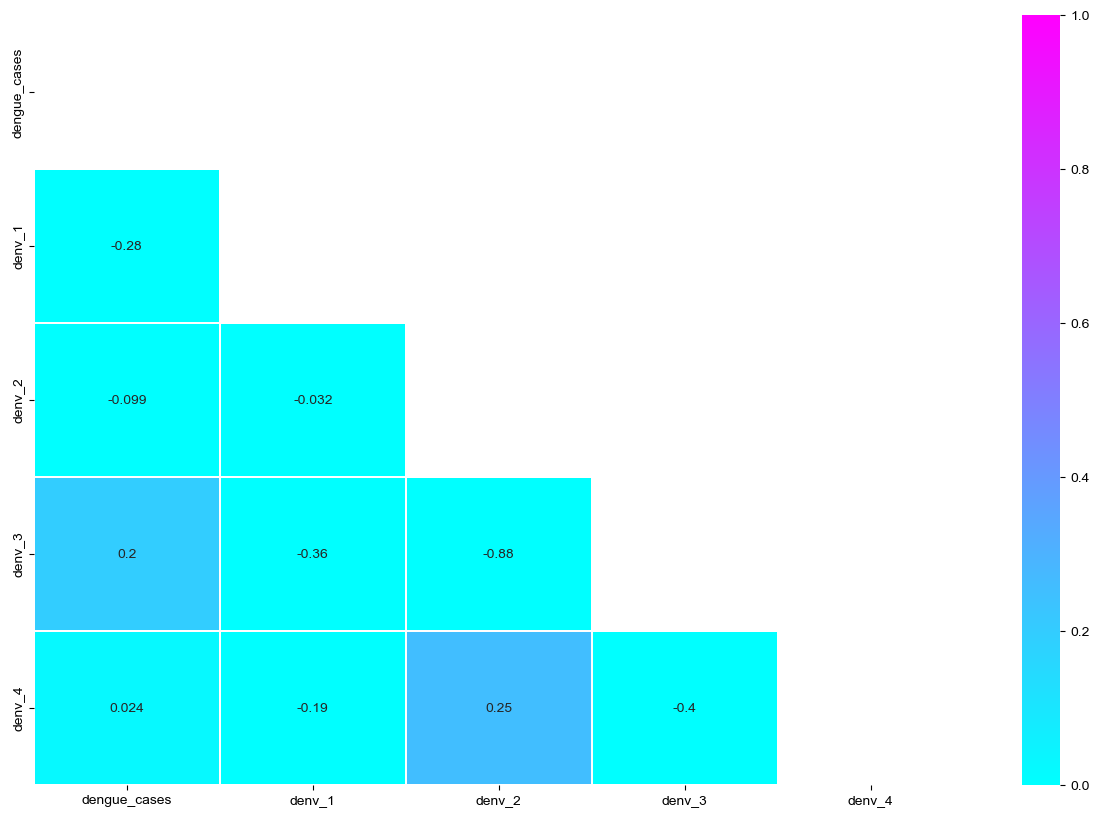

In [8]:
# First use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features
# Establish figure size
fig = plt.subplots(figsize=(15, 10))

# Create a mask for the top half (repeated values) of the heat map
mask = np.zeros_like(serotype_df.corr(), dtype=None)
mask[np.triu_indices_from(mask)]=True

# Plot the correlation heat map
sns.heatmap(serotype_df.corr(), vmin=0.0, vmax=1.0, mask=mask, cmap='cool', annot=True, linewidths = 0.3)
sns.set(font_scale=0.5)

# Display the heat map
plt.show();

---
### Time Series Line Plots

#### Dengue Cases from 2018 to 2023

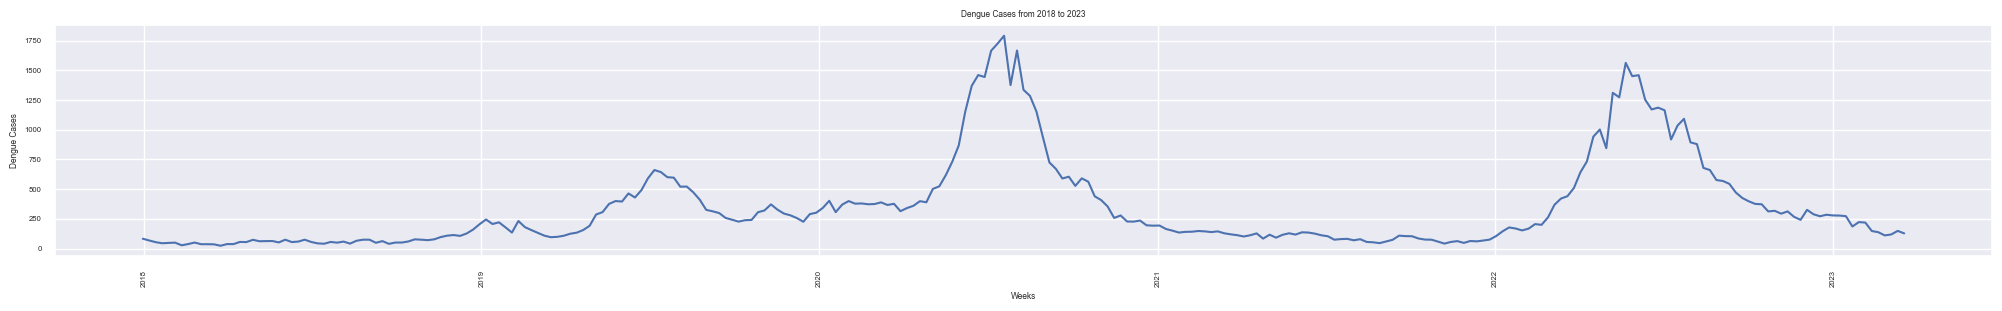

In [9]:
# Dengue Cases over the weeks
plt.figure(figsize=(25, 3))

x = serotype_df['date']
y = serotype_df['dengue_cases']

plt.plot(x,y)

plt.title(label='Dengue Cases from 2018 to 2023')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Dengue Cases')
plt.xticks(rotation=90);

#### Combined Serotype Data from 2018 to 2023

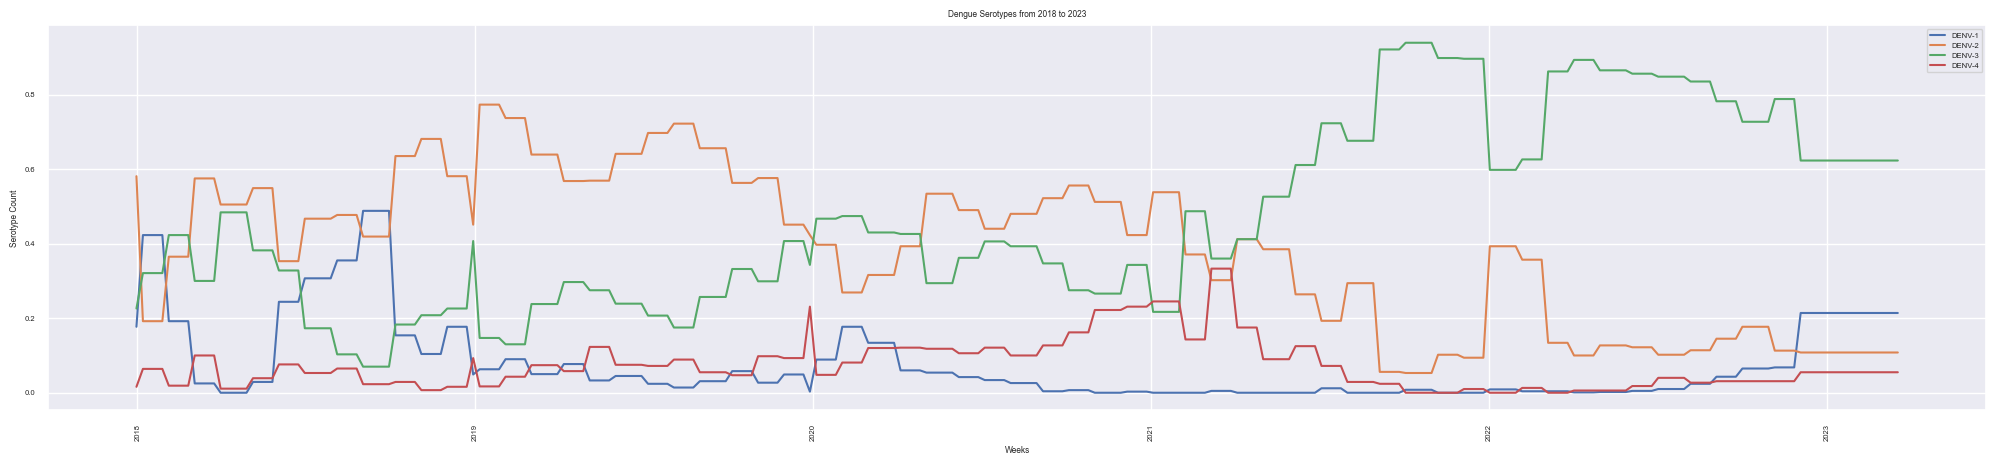

In [10]:
# Dengue Cases over the weeks
plt.figure(figsize=(25, 5))

# Define X and y
x = serotype_df['date']
y = serotype_df[['denv_1', 'denv_2', 'denv_3', 'denv_4']]

plt.plot(x,y)

plt.title(label='Dengue Serotypes from 2018 to 2023')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Serotype Count')
plt.xticks(rotation=90)

# Add legend
plt.legend(['DENV-1', 'DENV-2', 'DENV-3', 'DENV-4'], loc='upper right');

---
### Calendar Heatmaps

---
### Time Series Boxplot 
> * Yearly Trend

---
### Time Series Boxplot 
> * Monthly Trend

---
### Time Series Boxplot 
> * Weekly Trend

---
### Time Series Lag ScatterPlots

---
### Visualise Distributions using Histograms